In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [117]:
data = pd.read_csv("diabetes_data.csv")    

In [118]:
print(data.isnull().sum())             # check mising value


user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk_score              0
dtype: int64


In [119]:
data.columns = data.columns.str.strip()    # remove leading and trailing spaces 
print(data.columns)

Index(['user_id', 'date', 'weight', 'height', 'blood_glucose',
       'physical_activity', 'diet', 'medication_adherence', 'stress_level',
       'sleep_hours', 'hydration_level', 'bmi', 'risk_score'],
      dtype='object')


In [120]:
threshold = 0.5      # drostkrdni colume nwei outcome ta bzanin ka aya bhakani colome risk-score zyatrn law asti dyarikraw yan na.
data['Outcome'] = (data['risk_score'] > threshold).astype(int)   


In [121]:
print(data['Outcome'].value_counts())

Outcome
1    998
0      2
Name: count, dtype: int64


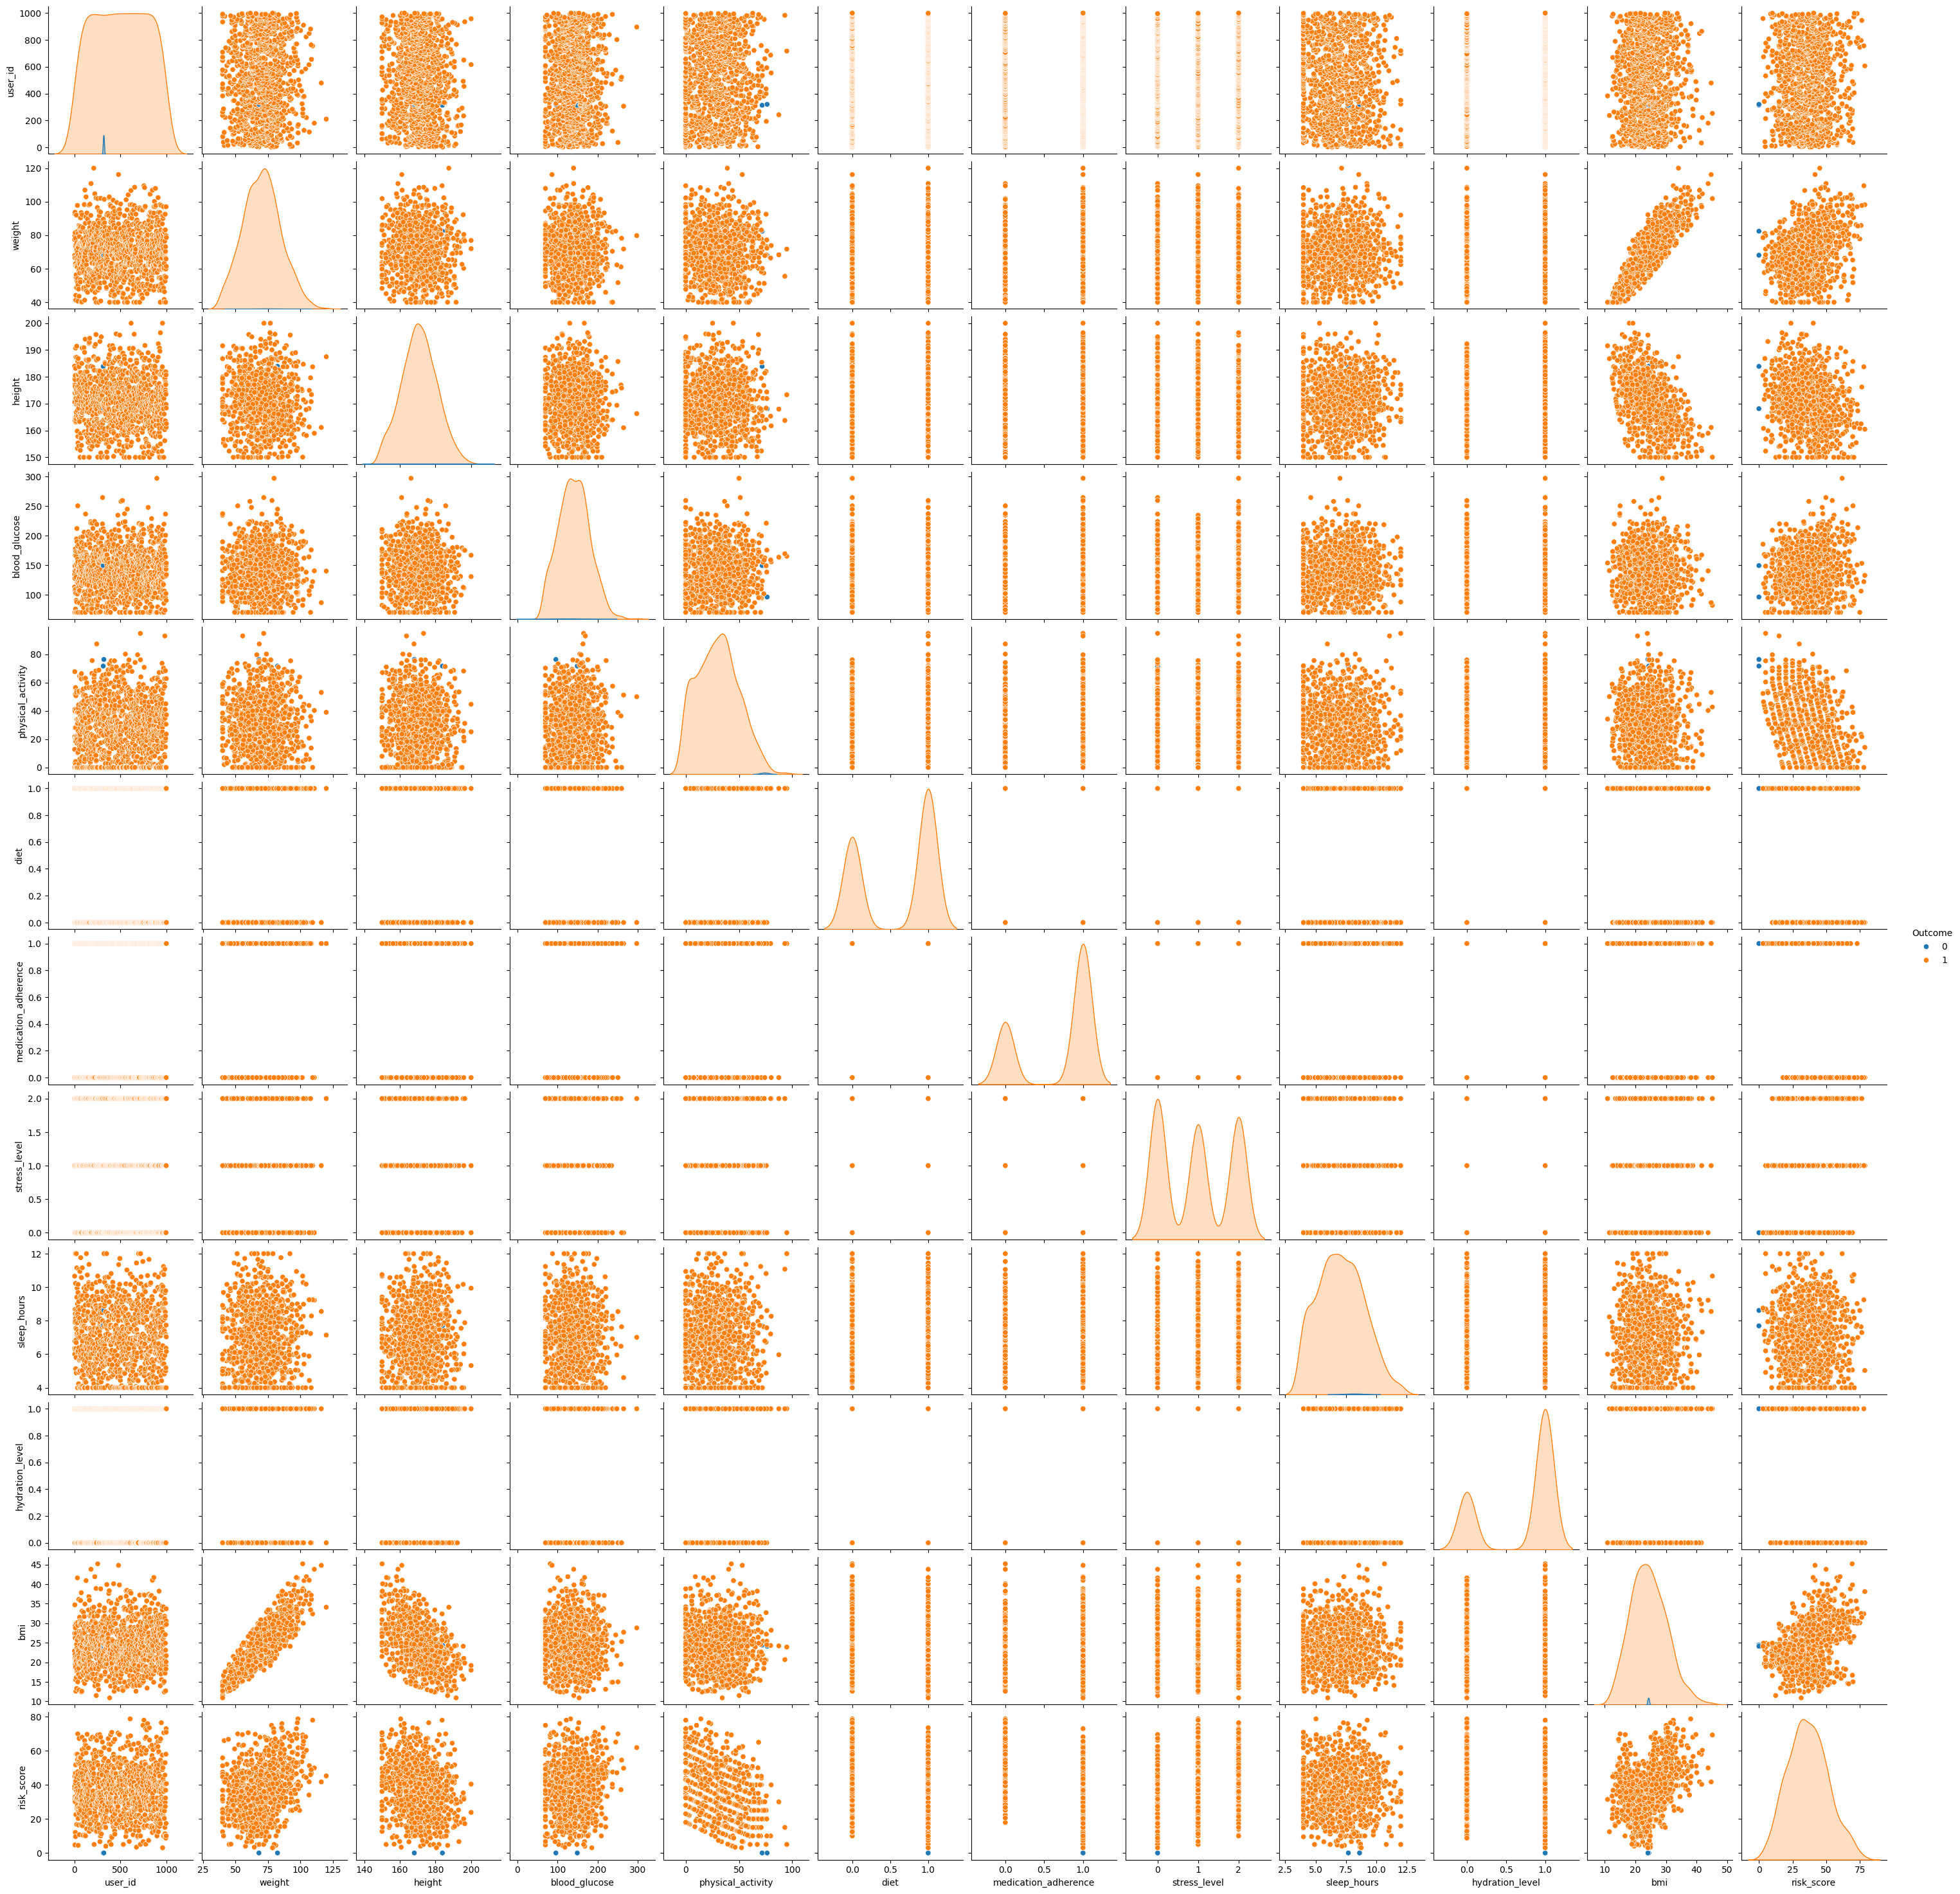

In [122]:
sns.pairplot(data, hue='Outcome')   # for view relationship between all numerical feauture in outcome column
plt.show()

In [ ]:
X = data.drop(['Outcome', 'risk_score', 'date'], axis=1, errors='ignore')  # for train model
y = data['Outcome']         #  target variable for model predict                  


In [ ]:
#split the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [131]:
model = RandomForestClassifier(random_state=42)


In [132]:
model.fit(X_train, y_train)     # train model

RandomForestClassifier(random_state=42)

In [133]:
y_pred = model.predict(X_test)   # make predictions using the trained model 
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [134]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy * 100:.2f}%')

accuracy: 99.00%


In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      0.99       198

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


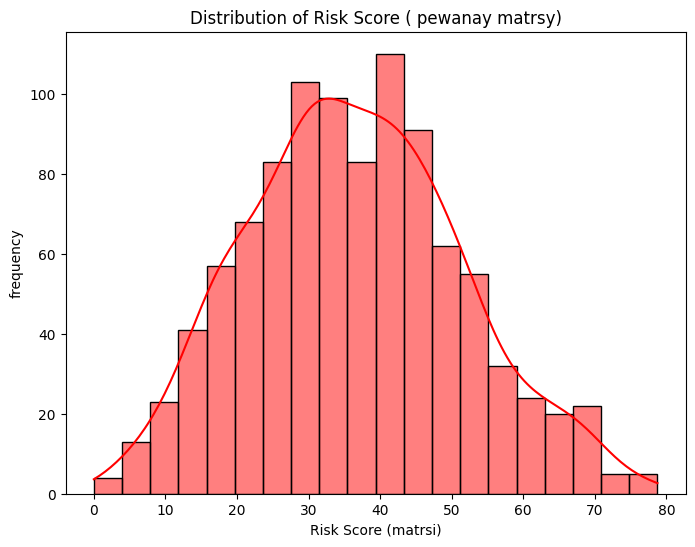

In [140]:
plt.figure(figsize=(8, 6))
sns.histplot(data['risk_score'], kde=True, color='red')  
plt.title("Distribution of Risk Score ( pewanay matrsy)")
plt.xlabel("Risk Score (matrsi)")
plt.ylabel("frequency")
plt.show()

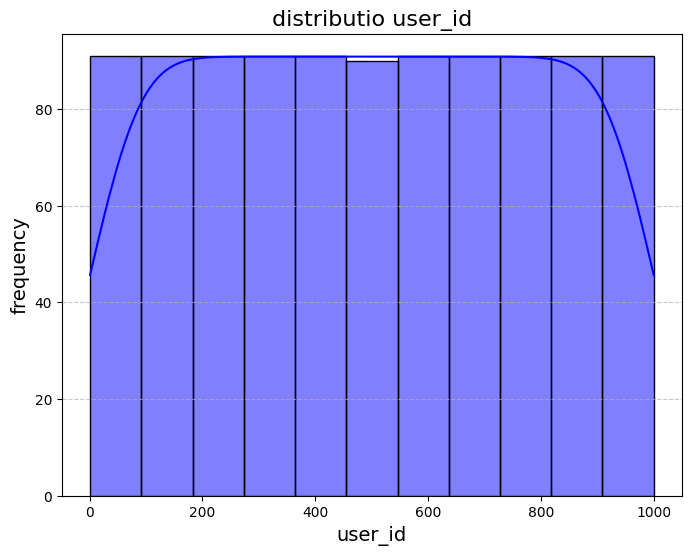

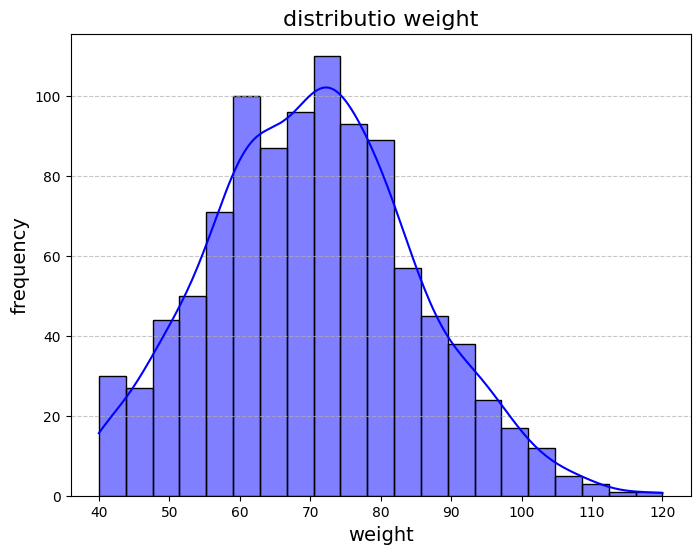

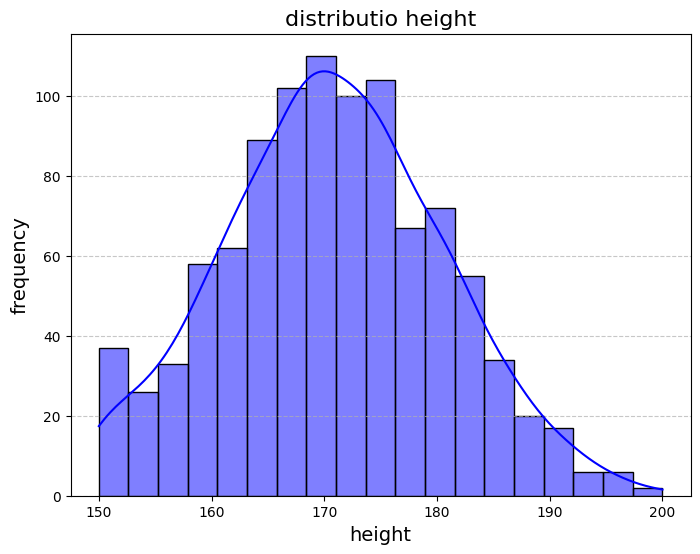

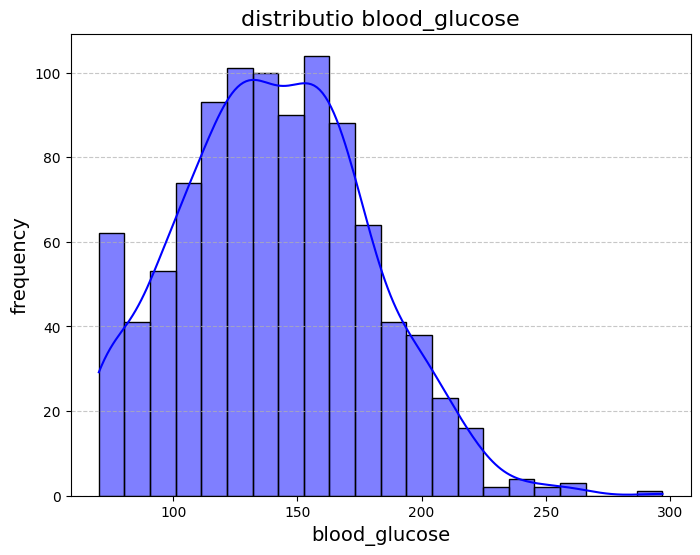

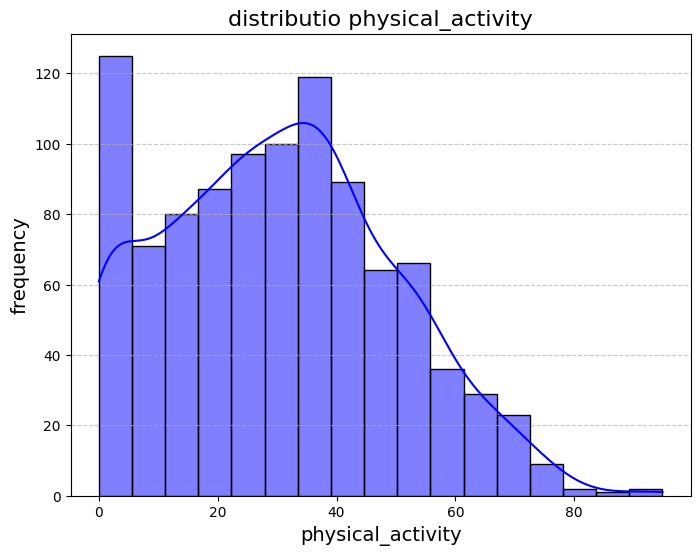

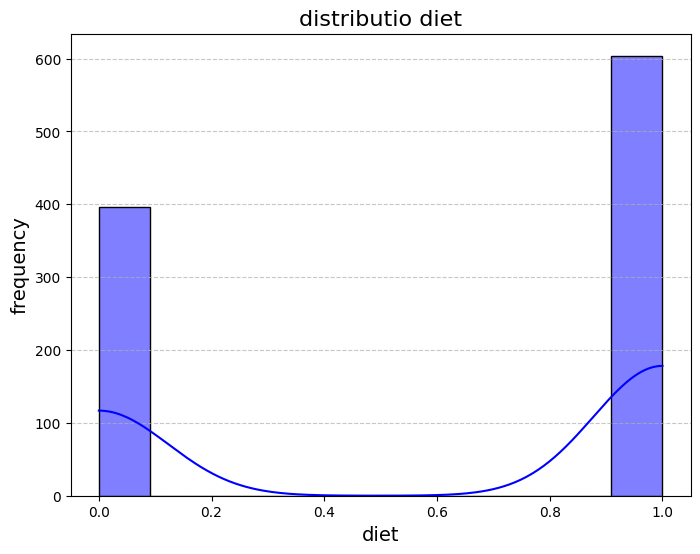

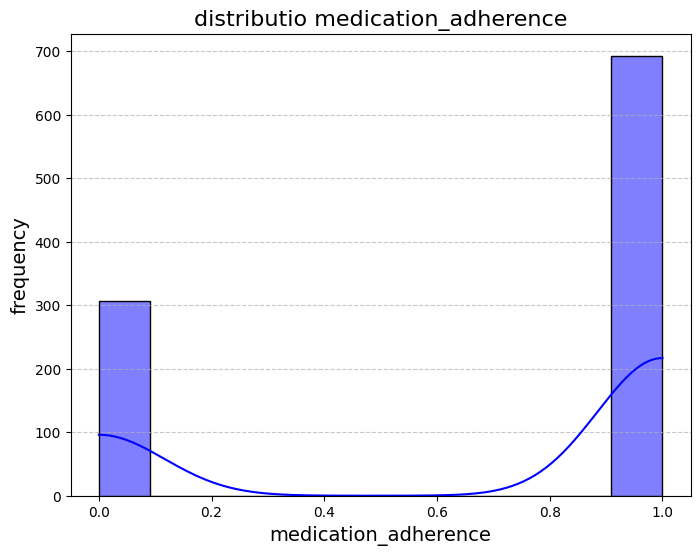

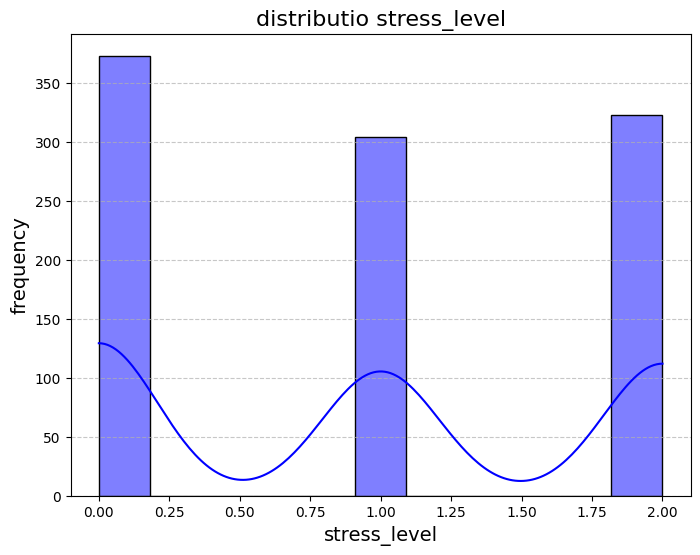

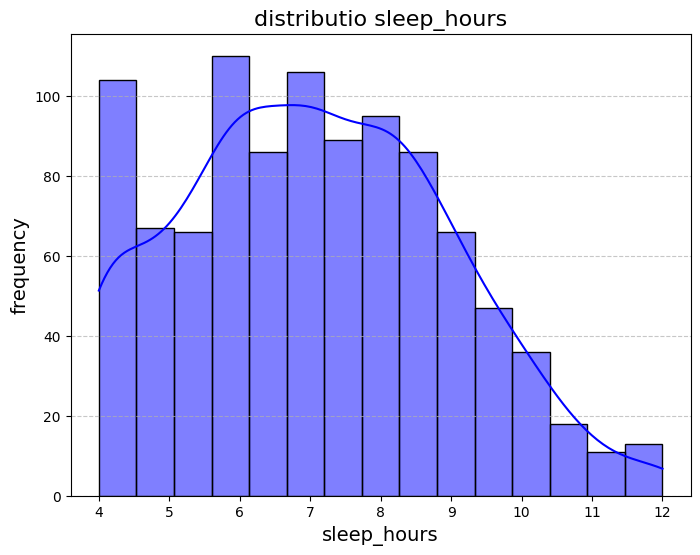

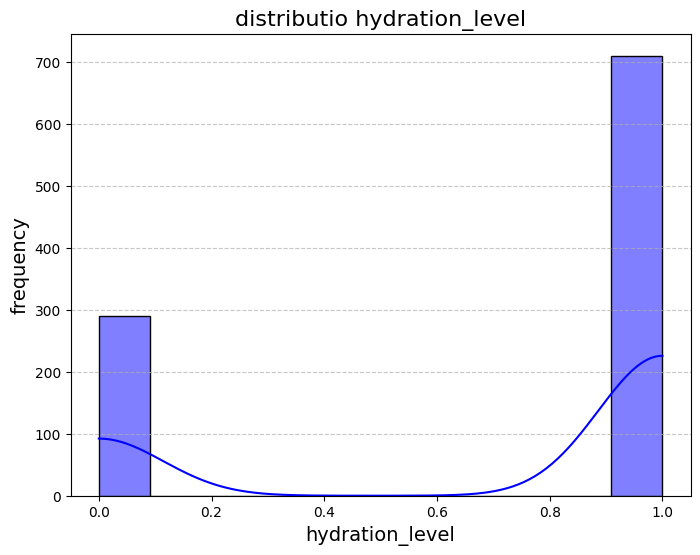

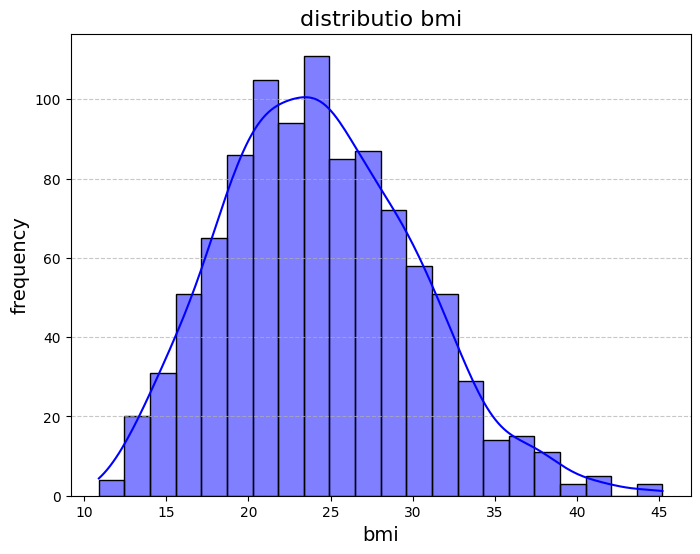

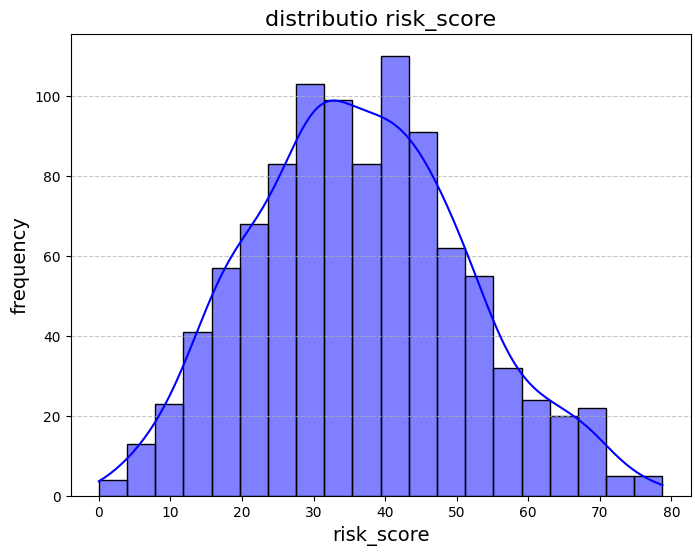

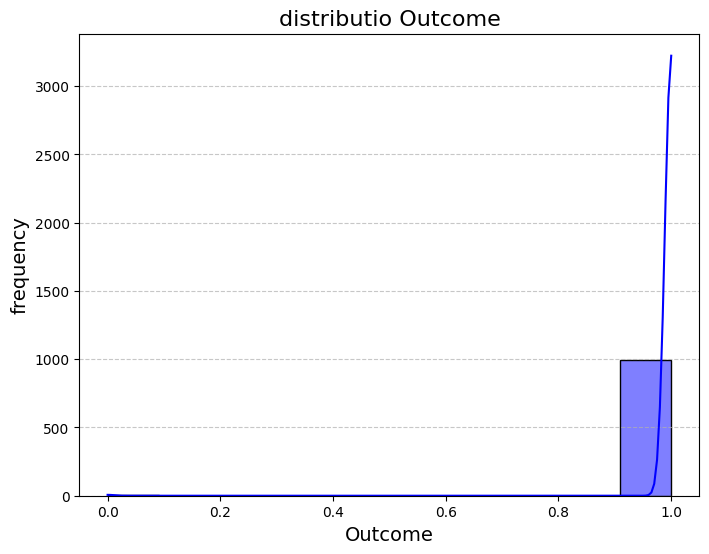

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns   # droskrdni histogram bo har colomek bo dozinaway matrsi
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, color='blue')  #
    plt.title(f"distributio {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()